In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import pearsonr

In [76]:
# Stores dataset
heart = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [77]:
# Looking for missing values in each collumn and summing the total in each.`
heart.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [78]:
heart

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


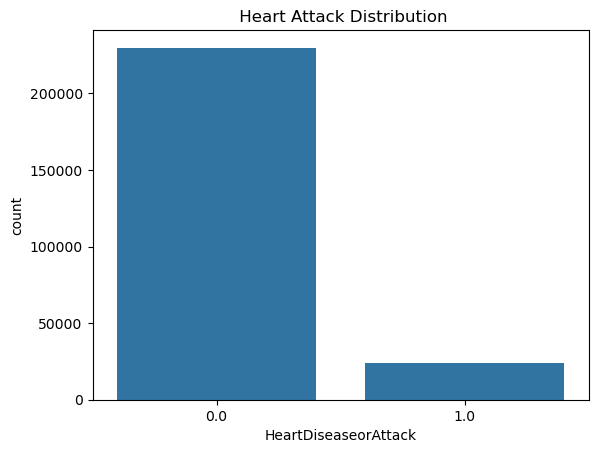

In [79]:
# creates a plot of the outcomes for the HeartDiseaseorAttack feature with 0 representing negative and 1 representing positive
sns.countplot(data=heart, x="HeartDiseaseorAttack")
plt.title(" Heart Attack Distribution")
plt.show()

In [80]:
heartdf_majority = heart[heart['HeartDiseaseorAttack'] == 1] 
heartdf_minority = heart[heart['HeartDiseaseorAttack'] == 0] 
# dowmnsample the majority class
heartdf_minority_upsampled = heartdf_minority.sample(n=len(heartdf_majority), replace=True, random_state=42)
# Combine the dowmnsample the majority class class with the majority class
heartdf_balanced = pd.concat([heartdf_majority, heartdf_minority_upsampled])


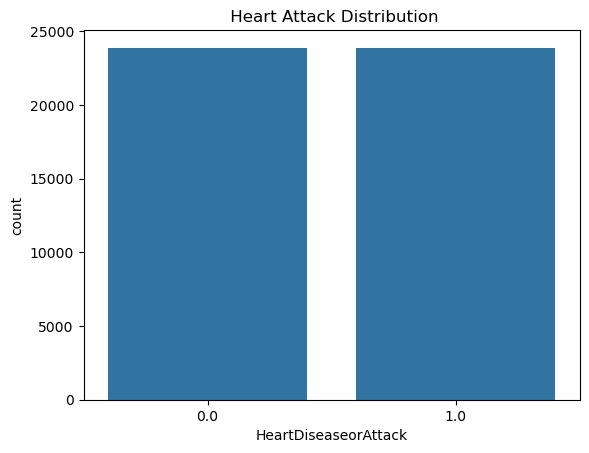

In [81]:
sns.countplot(data= heartdf_balanced, x="HeartDiseaseorAttack")
plt.title(" Heart Attack Distribution")
plt.show()

In [82]:
# creates scaler object and normalizes the heart dataset
scaler = MinMaxScaler()
Heart_Norm = pd.DataFrame(scaler.fit_transform(heartdf_balanced), columns=heartdf_balanced.columns)
Heart_Norm

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,1.0,0.209302,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.00,1.000000,1.000000,1.0,0.0,0.666667,0.8,0.000000
1,1.0,1.0,1.0,1.0,0.116279,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.50,1.000000,0.000000,1.0,0.0,0.916667,0.6,0.428571
2,1.0,1.0,1.0,1.0,0.290698,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.00,0.000000,0.000000,1.0,1.0,0.750000,1.0,0.571429
3,1.0,1.0,1.0,1.0,0.186047,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,0.0,1.0,0.916667,0.2,0.428571
4,1.0,1.0,1.0,1.0,0.151163,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.25,0.033333,0.000000,0.0,1.0,0.750000,0.6,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47781,0.0,0.0,1.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.666667,1.0,1.000000
47782,0.0,0.0,0.0,1.0,0.244186,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.75,0.066667,0.166667,0.0,0.0,0.333333,0.8,1.000000
47783,0.0,0.0,0.0,1.0,0.151163,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.133333,0.133333,0.0,0.0,0.500000,0.8,0.857143
47784,0.0,1.0,0.0,1.0,0.174419,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.50,0.033333,0.400000,1.0,0.0,0.416667,0.8,0.428571


In [83]:
# calculates correlation matrix 
corr_matrix = Heart_Norm.corr()

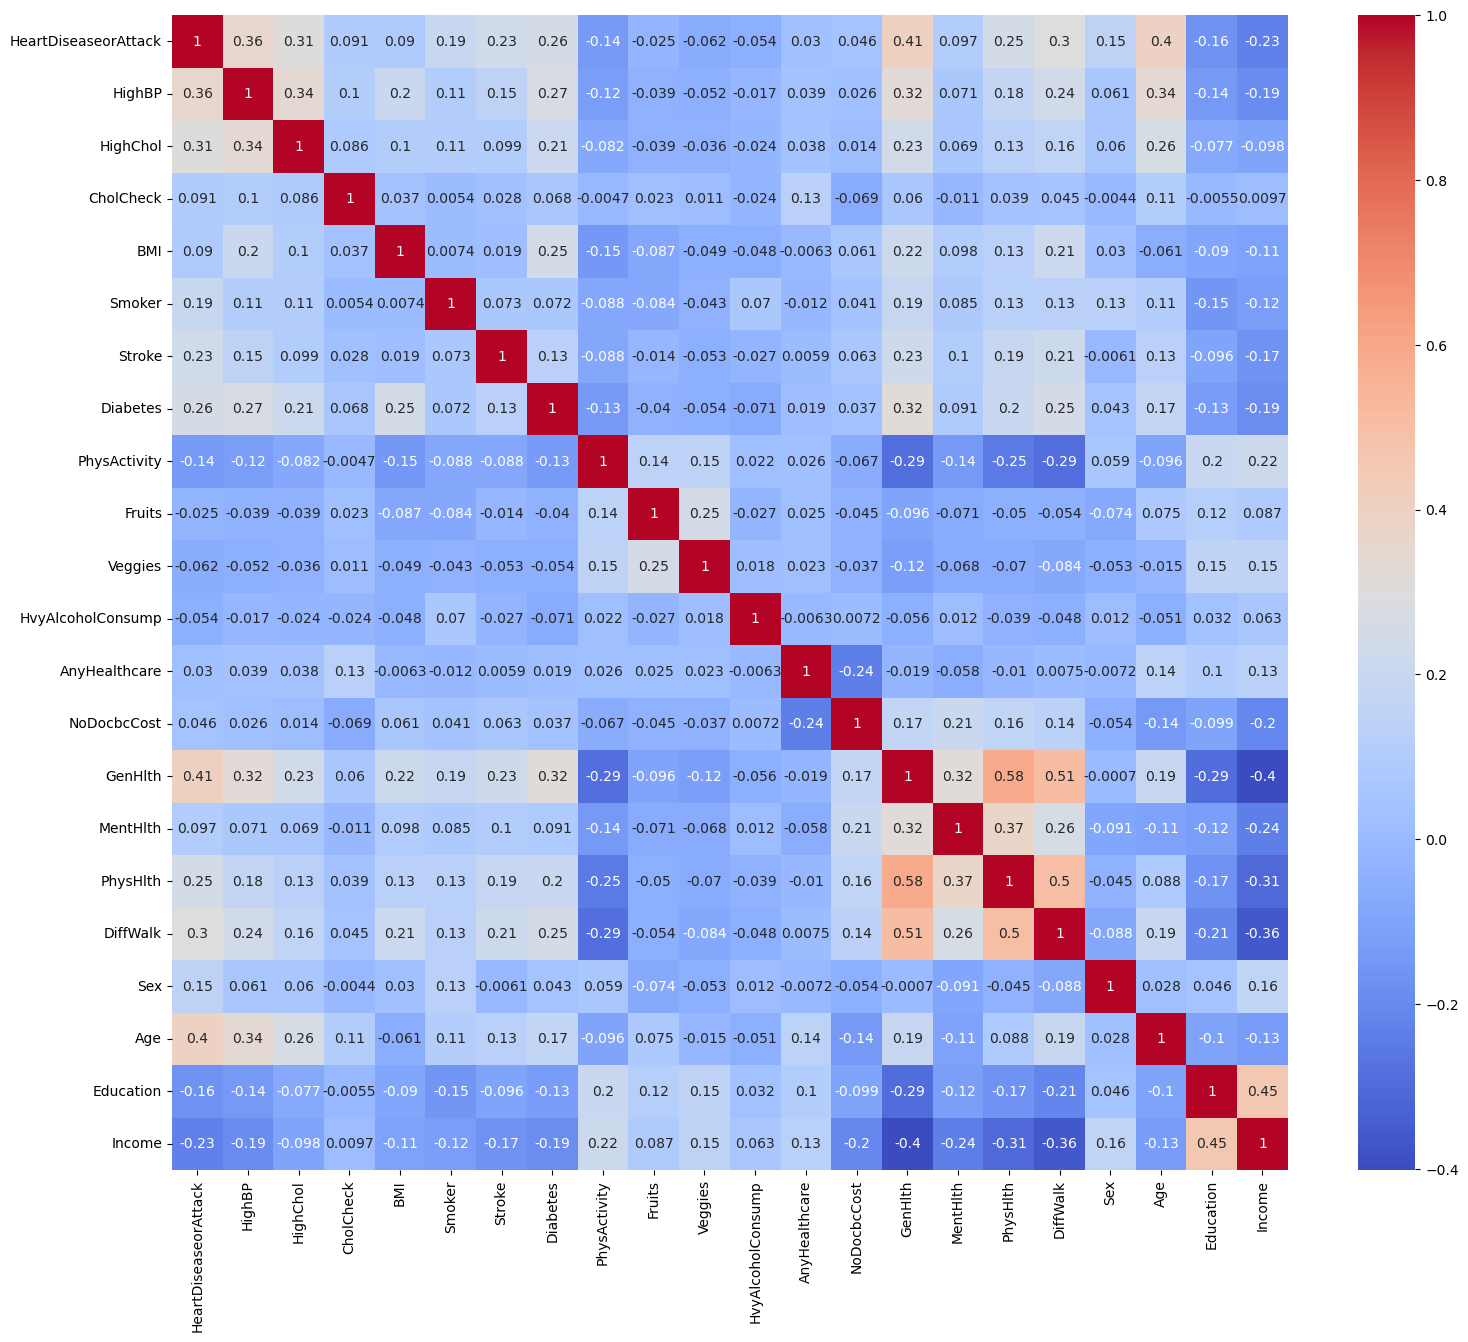

In [84]:
# creates heat map
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [85]:
# Split into features (X) and target variable (y)
X = Heart_Norm.drop(columns=['HeartDiseaseorAttack'])
y = Heart_Norm["HeartDiseaseorAttack"]
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_score(y_train, logreg.predict(X_train))

0.7697760803599456

In [87]:
# Evaluates the Logistic regression model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression:
Accuracy: 0.7759991630048128
              precision    recall  f1-score   support

         0.0       0.79      0.75      0.77      4818
         1.0       0.76      0.80      0.78      4740

    accuracy                           0.78      9558
   macro avg       0.78      0.78      0.78      9558
weighted avg       0.78      0.78      0.78      9558



In [88]:
train_accuracy = accuracy_score(y_train, logreg.predict(X_train))
test_accuracy = accuracy_score(y_test, logreg.predict(X_test))


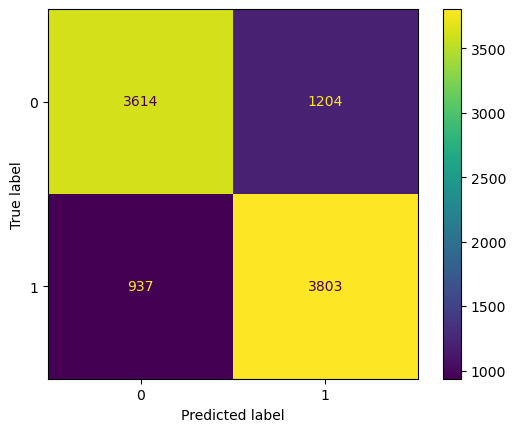

In [89]:
CM = confusion_matrix(y_test, y_pred_logreg)
cm=ConfusionMatrixDisplay(confusion_matrix=CM)
cm.plot()

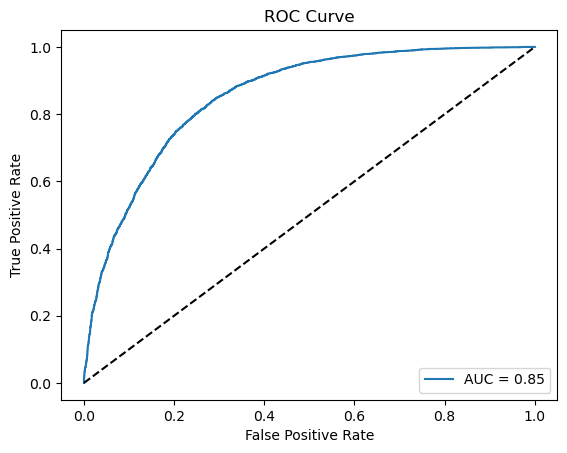

In [90]:
# Predict probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculates ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculates AUC
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()